# On the association of Parkinson's & Vocal patterns 
###### By Daniel Cho 

## Introduction
##### Parkinson's disease (PD) is a condition which causes cellular degeneration of the victim's brain, ultimately leading to severely detrimental physical function (National Institutes of Health, 2023). Treatments for it are significantly more effective when applied at an early stage of the disease, thus it is desirable to find physiological symptoms which act as an early sign of Parkinson's (Parkinson's Foundation, 2023). One particular symptom are vocal patterns in a patient; in this analysis, our ultimate goal is to answer: are vocal patterns a reliable, early indication of Parkinson's disease?


This notebook is broken down into 6 parts (excl. References):

- Introduction - (Initial dive into what the notebook is analysing/achieving)
- Data Description & Exploratory Analysis - (Really looking at the data and laying out)
- Build the Model(s) - (Building regression models for the dataset, training and testing)
- Discussion of Results - (Collection of thoughts regarding analyses' results and implications)
- Conclusion - (Ultimatum of findings and results)

## Data Description

In [4]:
#Importing libraries/packages
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition      import PCA
from sklearn.preprocessing      import StandardScaler
from sklearn.ensemble           import RandomForestClassifier
from sklearn.model_selection    import train_test_split
from sklearn.linear_model       import LogisticRegression, LinearRegression
from sklearn.metrics            import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [5]:
#Importing headers from Parkinsons_ReadMe.txt
header = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)',
          'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3',
          'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA','NHR', 'HNR', 'Target', 'RPDE', 'DFA',
          'spread1', 'spread2', 'D2', 'PPE']

#Initializing 'df' as our data frame.
df = pd.read_csv('parkinsons.csv', header=None, names = header)

##### In this dataset, courtesy of UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/parkinsons) we have 147 instances of PD and 48 non-instances:

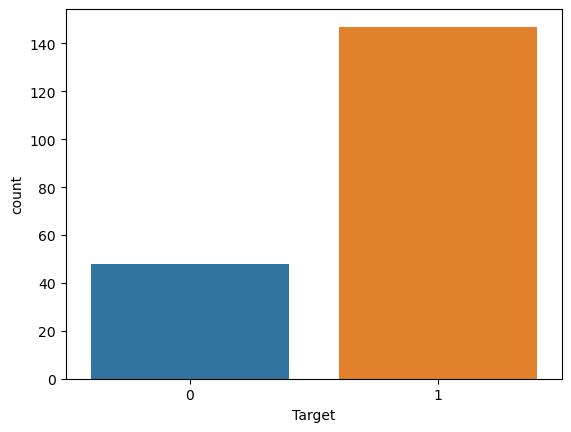

In [6]:
count = sns.countplot(x = "Target", data = df)

##### Our binary attribute 'Target' defines whether a person has PD (1) or does not (0).
##### The dataset provided consists of 195 instances and 22 features (excl. Target).

In [7]:
#Displaying head and metadata of dataset.
df.info()
df.head()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  Target            195 non-null    int64  
 1

(195, 23)

In [8]:
#Describing the dataset
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,Target,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367



##### At hindsight, our dataset comes with a plentiful amount of features for analysis between vocal patterns and PD. However, the dataset is arguably relatively small and may not be generally representative of the whole population with PD. Furthermore there is no variable which measures severity of the disease, limiting our analyses.

# Exploratory Analysis
##### With 22 variables at hand, there is a significant amount of work to be done when it comes to slicing our dataset.
##### We will use principle component analysis (PCA) to find relevant variables. Otherwise, our model will lead towards overfitting.
##### To begin with, we will initialize our x and y:


In [9]:
#Initializing x and y.
x = df.drop(['Target'], axis = 1)
y = df['Target']

##### Next, we will normalize and then standardize our dataframe:

In [10]:
#Normalizing data
norm = (df - df.min()) / (df.max() - df.min())
scaler = StandardScaler()

#Standardizing data
std = scaler.fit_transform(norm)

model = PCA(n_components = 22)
pca_trans_frame = model.fit_transform(std)

##### Our next step is to visualise the explained variance, which allows us to see how much information each principle component contributes to the overall variance in the data
##### Cumulative sum graph version: 

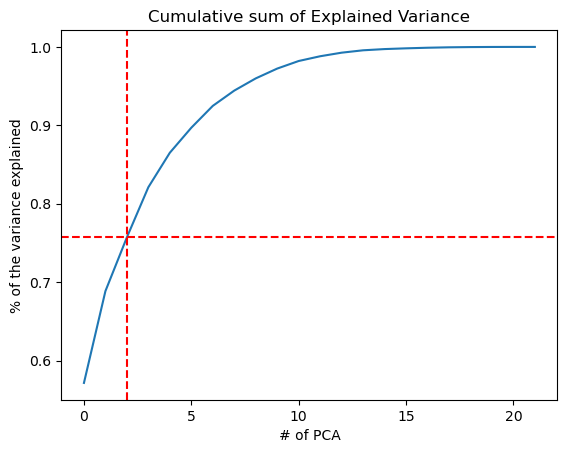

In [11]:
#Plotting the visualisation as a cumulative sum.
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.title('Cumulative sum of Explained Variance')
plt.xlabel('# of PCA')
plt.ylabel('% of the variance explained')
x_value = 2
y_value = np.cumsum(model.explained_variance_ratio_)[x_value ]
plt.axvline(x = x_value, linestyle = '--', color = 'red')
plt.axhline(y = y_value, linestyle = '--', color = 'red')
plt.show()


##### Scree plot version: 

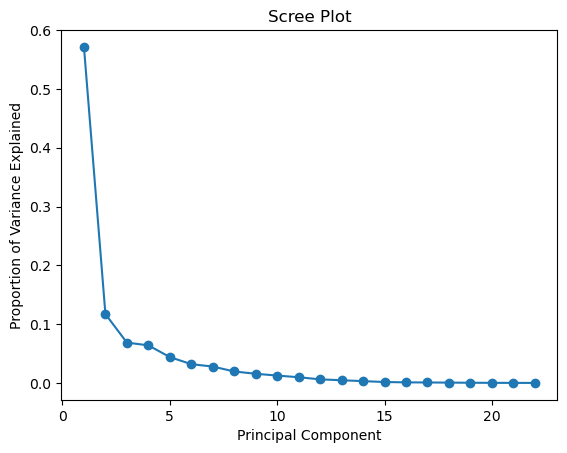

In [12]:
#Proportion of variance explained in y-axis.
plt.plot(range(1, model.n_components_+1), model.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.show()

##### The difference between `proportion of variance exp.` and `eigenvalue` is that the former represents the fraction of the total variation whereas the latter represents the total amount.

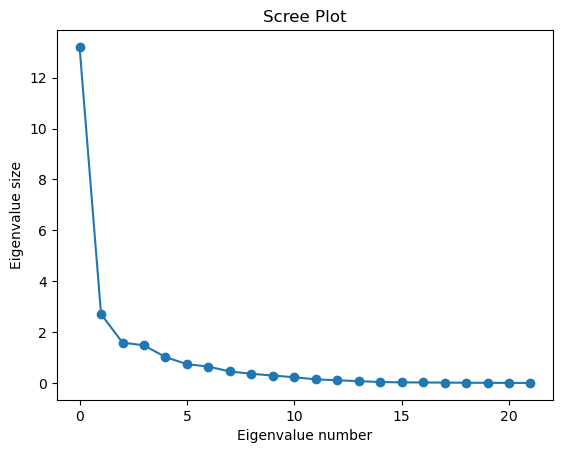

In [13]:
#Eigenvalue y-axis
plt.plot(model.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")
plt.show()

### As we can see, there is a noticeable spike in both graphs from index 0 to 1. This indicates we should utilize two PCAs.

##### Our next step will be visualising the PCAs using the first two as seen below:
###### (This allows us to take a look at the structure of our data amongst all the clutter.)

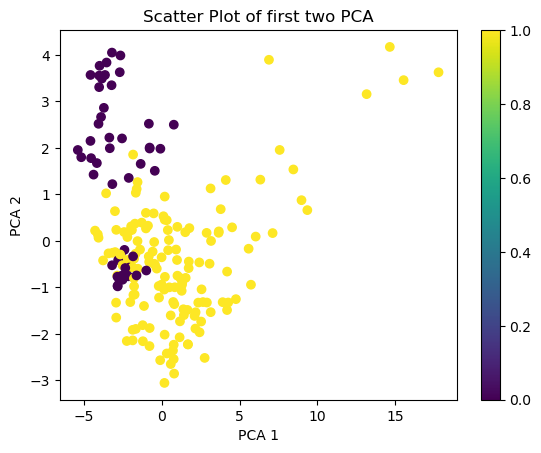

In [14]:
plt.scatter(pca_trans_frame[:,0],pca_trans_frame[:,1], c = df['Target'])
plt.colorbar()
plt.title('Scatter Plot of first two PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

#### This box plot demonstrates that multiple outliers are present in the PCA: 

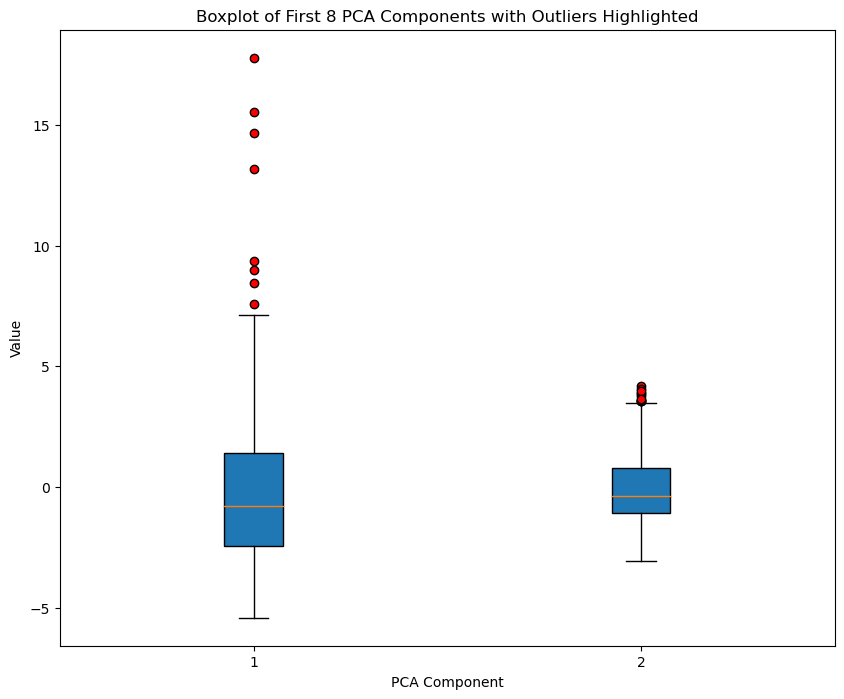

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))
boxplot = ax.boxplot(pca_trans_frame[:, :2], notch=False, patch_artist=True, labels=range(1, 3),
                     flierprops=dict(markerfacecolor='red', marker='o'))
ax.set_xlabel('PCA Component')
ax.set_ylabel('Value')
ax.set_title('Boxplot of First 8 PCA Components with Outliers Highlighted')
plt.show()


### The histogram below visualises the significant presence of left-skew in our variable data:

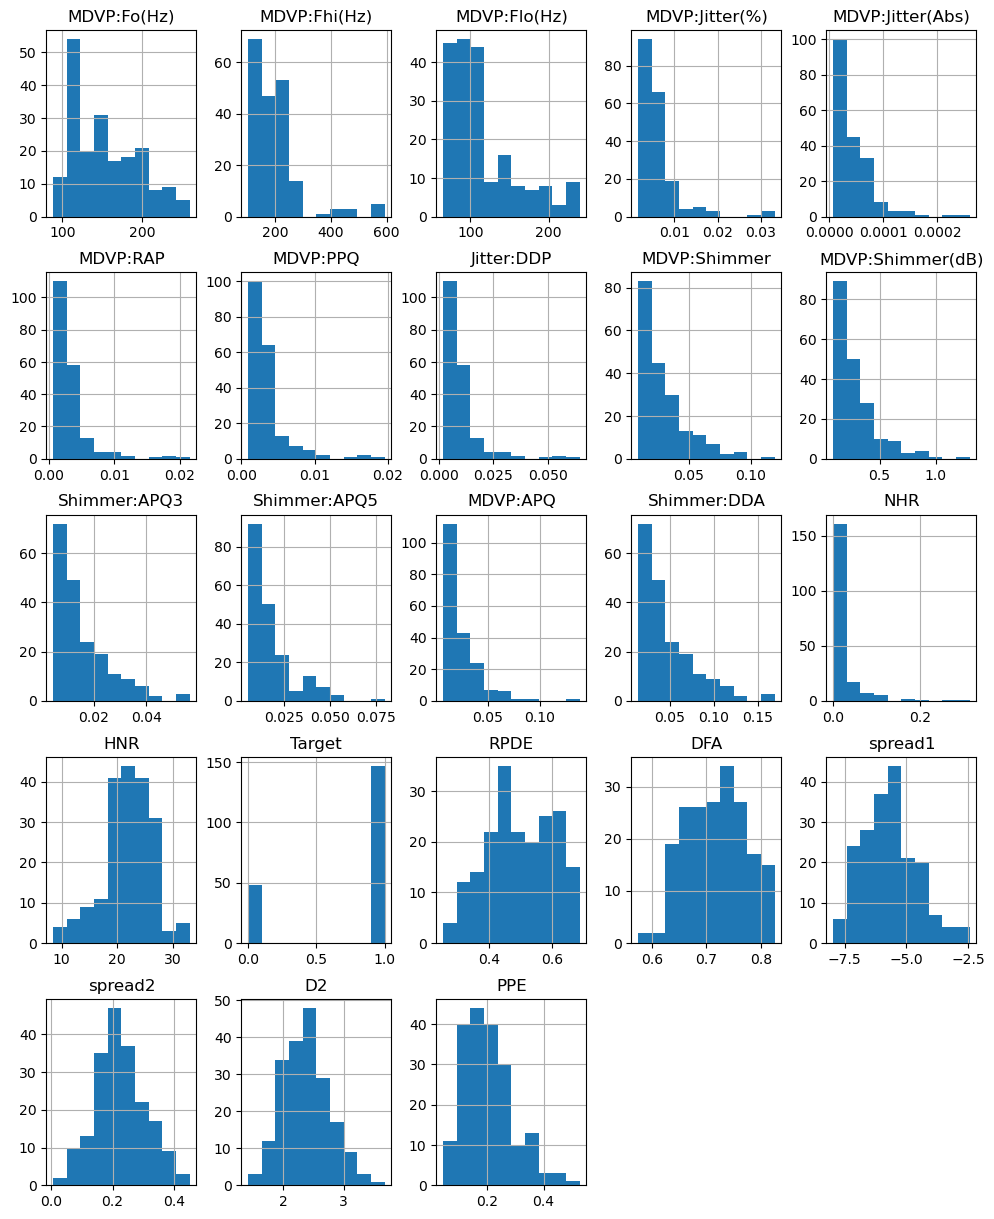

In [16]:
df.hist(figsize=(12,15));

## Build The Model(s)
### In this section we will be developing two models, a linear and logistic model; we'll then compare the two models and evaluate its performance using various metrics such as accuracy, precision, recall, and F1 score (Sayah, 2023). By building and analyzing these models, we hope to gain insights into the underlying patterns and relationships in our data and improve our understanding of Parkinson's disease.
##### For all models, a ratio of `4:1` will be utilised for train (80%) : test (20%).

In [17]:
#Reducing dimensionality to 2 dimensions using PCA
pca = PCA(n_components=2)
X = pca.fit_transform(x)

### Linear Model:

In [18]:
#Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Fitting a linear regression model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

#Predicting the test data
y_pred_lin = linear_model.predict(x_test)


##### Evaluating the linear model:

In [19]:
#Evaluating the linear model
coefficients = linear_model.coef_
print("Coefficients:\n", coefficients,"\n")
#Classification grid
f1 = classification_report(y_test, y_pred_lin.round())
conf_mat_lin = confusion_matrix(y_test, y_pred_lin.round())
print("Classification:\n", f1)
#F1 score
report = classification_report(y_test, y_pred_lin.round(), output_dict=True)
f1_score_lin = report['weighted avg']['f1-score']
print("F1 Score:", f1_score_lin,"\n")
#Confusion Matrix
print("Confusion Matrix:\n", conf_mat_lin)

Coefficients:
 [-0.00094678 -0.00287067] 

Classification:
               precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.88      0.97      0.92        29

    accuracy                           0.87        39
   macro avg       0.87      0.78      0.81        39
weighted avg       0.87      0.87      0.86        39

F1 Score: 0.8636352397200999 

Confusion Matrix:
 [[ 6  4]
 [ 1 28]]


Linear regression model has an `F1 score` of `0.86`

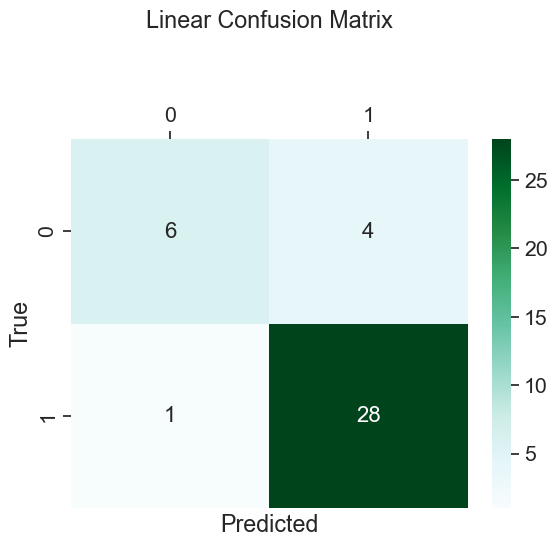

In [20]:
# Plot confusion matrix
sns.set(font_scale=1.4)
sns.heatmap(conf_mat_lin, annot=True, annot_kws={"size": 16}, cmap='BuGn', fmt='g')
plt.title("Linear Confusion Matrix", pad = 80)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.gca().xaxis.tick_top()
plt.gca().yaxis.tick_left()
plt.show()


### Logistic Model: 

In [21]:
#Producing logistic model: 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

y_pred_log = log_model.predict(x_test)


##### Evaluating the logistic model: 

In [22]:
#Evaluating logistic model:
coefficients = log_model.coef_
print("Coefficients:\n", coefficients,"\n")

report_log = classification_report(y_test, y_pred_log.round(), output_dict=True)
f1_log = classification_report(y_test, y_pred_log.round())

print("Classification, \n", f1_log)

f1_score_log = report_log['weighted avg']['f1-score']
print("F1 Score:", f1_score_log,"\n")

conf_mat_log = confusion_matrix(y_test, y_pred_log.round())
print("Confusion Matrix:\n", conf_mat_log)

Coefficients:
 [[-0.00511707 -0.01571384]] 

Classification, 
               precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.85      0.97      0.90        29

    accuracy                           0.85        39
   macro avg       0.84      0.73      0.76        39
weighted avg       0.84      0.85      0.83        39

F1 Score: 0.8318858560794044 

Confusion Matrix:
 [[ 5  5]
 [ 1 28]]


##### Logistic regression model has an `F1 score` of `0.83`

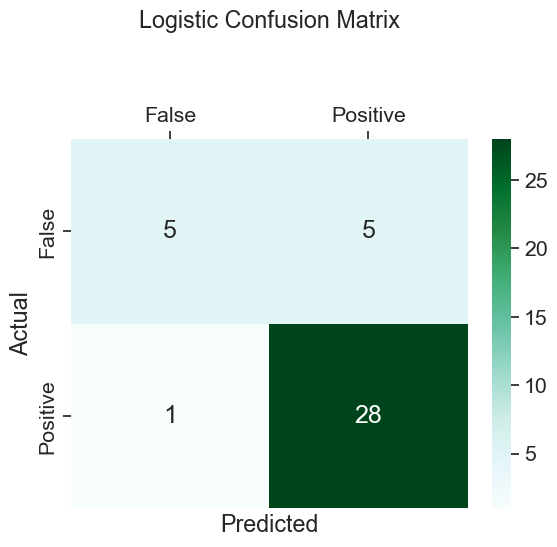

In [23]:
# Define the labels
labels = ['False', 'Positive']

# Plot the confusion matrix with labels
sns.set(font_scale=1.4)
sns.heatmap(conf_mat_log, annot=True, annot_kws={"size": 18}, cmap='BuGn', fmt='g', xticklabels=labels, yticklabels=labels)
plt.title("Logistic Confusion Matrix", pad = 80)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.gca().xaxis.tick_top()
plt.gca().yaxis.tick_left()
plt.show()


### Random Forest model:

In [24]:
rf_model = RandomForestClassifier(random_state=2)
rf_model.fit(x_train, y_train)

#Predicting the test data
y_pred_rf = rf_model.predict(x_test)

### Evaluating the random forest model:

In [25]:
#Evaluating the model
coefficients = linear_model.coef_
print("Coefficients:\n", coefficients,"\n")

f1_rf = classification_report(y_test, y_pred_rf)
print("Classification:\n", f1_rf)
report_rf = classification_report(y_test, y_pred_rf.round(), output_dict=True)

f1_score_rf = report_rf['weighted avg']['f1-score']
print("F1 Score:", f1_score_rf,"\n")

conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", conf_mat_rf)

Coefficients:
 [-0.00094678 -0.00287067] 

Classification:
               precision    recall  f1-score   support

           0       0.56      0.50      0.53        10
           1       0.83      0.86      0.85        29

    accuracy                           0.77        39
   macro avg       0.69      0.68      0.69        39
weighted avg       0.76      0.77      0.77        39

F1 Score: 0.765113566184039 

Confusion Matrix:
 [[ 5  5]
 [ 4 25]]


##### Random Forest model has an `F1 score` of `0.77`

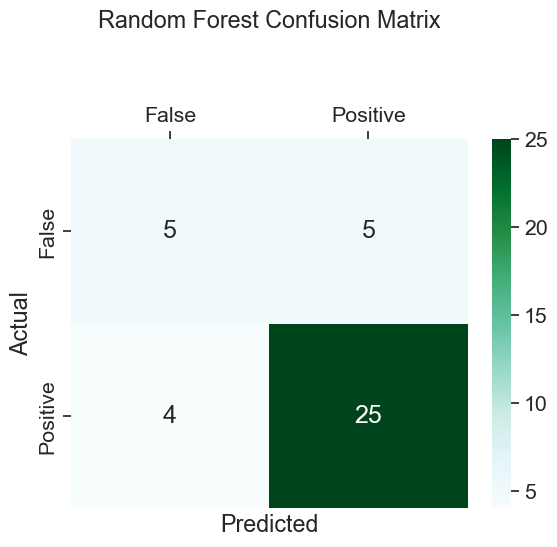

In [26]:
# Define the labels
labels = ['False', 'Positive']

# Plot the confusion matrix with labels
sns.set(font_scale=1.4)
cm = sns.heatmap(conf_mat_rf, annot=True, annot_kws={"size": 18}, cmap='BuGn', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
cm.set_title("Random Forest Confusion Matrix", pad=80)
plt.gca().xaxis.tick_top()
plt.gca().yaxis.tick_left()
plt.show()

## Discussion of Results

##### Our results in the process of building our models demonstrated that Linear Regression proved to be the best model with an f1-score of `0.86`. Behind it were Logistic Regression and Random Tree which had an f1-score of `0.83` and `0.77` respectively (rounded to 2 d.p). 

##### To begin our discussion, Random Tree requires extensive tweaking in its hyperparameters in order to yield a high accuracy; no hyperparameters were implemented hence it is not surprising Random Tree has the lowest score. Furthermore, Random Tree models are hindered if datasets are imbalanced, meaning that variables do not possess an equivalent number of samples. This can lead to bias for variables with higher samples than ones with lower rates (Sayah, 2023).

##### Beyond our f1-score metric, we can also visualize the ROC curve to find that our Random Forest model is on par, slightly beyond even, of our logistic model: 

In [36]:
# Make predictions on test data for logistic regression model
y_pred_proba_log = log_model.predict_proba(x_test)[:, 1]

# Compute false positive rate and true positive rate for logistic regression model
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_proba_log)

# Calculate area under the curve for logistic regression model
roc_auc_log = auc(fpr_log, tpr_log)

# Make predictions on test data for random forest model
y_pred_proba_rf = rf_model.predict_proba(x_test)[:, 1]

# Compute false positive rate and true positive rate for random forest model
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)

# Calculate area under the curve for random forest model
roc_auc_rf = auc(fpr_rf, tpr_rf)

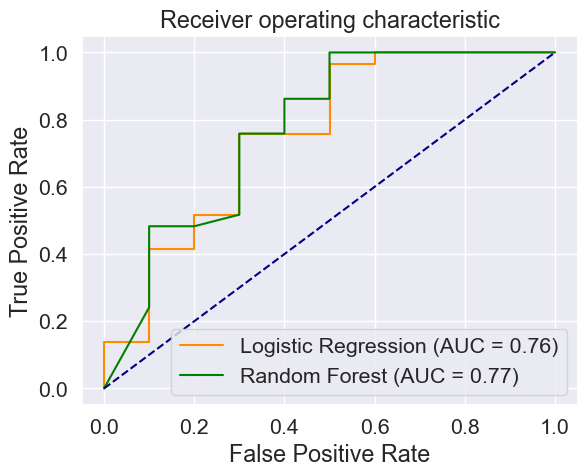

In [37]:
# Plot ROC curves
plt.plot(fpr_log, tpr_log, color='darkorange', label='Logistic Regression (AUC = %0.2f)' % roc_auc_log)
plt.plot(fpr_rf, tpr_rf, color='green', label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

##### In second place comes our Logistic Regression model, which does not sit far from our linear regression model in terms of `f1-score`. One reason for this might be that some variables possess a non-linear relationship with `Target`. Another issue is that Logistic Regression is susceptible to error if outliers are not removed. 
##### An example would be below where we take the IQR in order to remove outliers:

In [27]:
#Eliminating outliers outside 1.5 * IQR for the data the model is being trained on
q1 = np.percentile(x_train, 25, axis=0)
q3 = np.percentile(x_train, 75, axis=0)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = np.where((x_train < lower_bound) | (x_train > upper_bound))

In [28]:
#Implementing cleaned data to new variables
X_train_clean = np.delete(x_train, outliers[0], axis=0)
y_train_clean = np.delete(y_train.values, outliers[0], axis=0)

##### However, such an implementation (of cleaned data) may result in overfitting, which logistic regression is especially prone to. This can occur when the model is too _good_ with the data, to the point of picking up undesirable noise/fluctuations in data. With this in consideration, it is reasonable to say that our logistic regression model's lower performance is better for the sake of accuracy.

##### In first place is our linear regression model. The explanation for this is that our dataset likely follows a linear relationship. Another explanation is that linear regression models tend to follow well in performance when the data is scaled appropriately. In our case, we normalized and then standardized the dataset which likely assisted in making the model converge faster. 
##### Ultimately however, linear regression is not suitable for classification: predicting continuous data rather than discrete; so while it has received the highest f1-score, its application is ultimately inappropriate in our scenario. An ideal scenario would be the measurement of some continuous entity, such as the severity of the disease or its cumulative progression over time.

## Conclusion
##### In conclusion, our logistic and random forest models were able to train and test on our dataset and successfully return whether a patient had PD based on data which captured their vocal signatures, as suggested by their fairly high f1-score and area under the ROC curve, ultimately confirming that vocal patterns can indeed be used to classify Parkinson's Disease. Despite this, it is not advisable to assess a patient merely on this model, as our analysis and model have limitations, such as the lack of continuous measurements like severity and progression of the illness as previously mentioned. 
##### While vocal patterns are a source of indication, it is far more prudent to instead attach it to a larger diagnostic process involving more steps, acting as a biomarker rather than the entire diagnosis. This allows vocal patterns to become a promising and important step in PD diagnosis.

## References
### - (UCI, Machine Learning Repo.)      `https://archive.ics.uci.edu/ml/datasets/parkinsons` 
### - (Sayah, Fares)      `https://www.kaggle.com/code/faressayah/practical-guide-to-6-classification-algorithms`
### - (Parkinson's Foundation) `https://www.parkinson.org/understanding-parkinsons/10-early-signs`
### - (National Institutes of Health) `https://www.ninds.nih.gov/health-information/disorders/parkinsons-disease`